In [9]:
#Importing the libraries
import optuna
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

In [10]:
#Importing the dataset

diabetes_data = pd.read_csv('diabetes_data.csv')

In [11]:
#Checking the first 5 rows
diabetes_data.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [12]:
#Dropping the 'Doctor in charge' column
diabetes_data.drop('DoctorInCharge', axis=1, inplace=True)
diabetes_data.drop('PatientID', axis=1, inplace=True)
diabetes_data.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,44,0,1,2,1,32.985284,1,4.499365,2.443385,4.898831,...,0,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1
1,51,1,0,1,2,39.916764,0,1.578919,8.301264,8.941093,...,0,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1
2,89,1,0,1,3,19.782251,0,1.177301,6.103395,7.722543,...,0,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0
3,21,1,1,1,2,32.376881,1,1.714621,8.645465,4.804044,...,0,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0
4,27,1,0,1,3,16.808600,0,15.462549,4.629383,2.532756,...,0,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0


In [13]:
#Scaling diabetes_data
scaler = StandardScaler()
scaler.fit(diabetes_data)
scaled_data = scaler.transform(diabetes_data)



c:\Users\Cajun\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] seed is set=42, random_state=42 will be ignored. Current value: seed=42
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] seed is set=42, random_state=42 will be ignored. Current value: seed=42
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] seed is set=42, random_state=42 will be ignored. Current value: seed=42
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

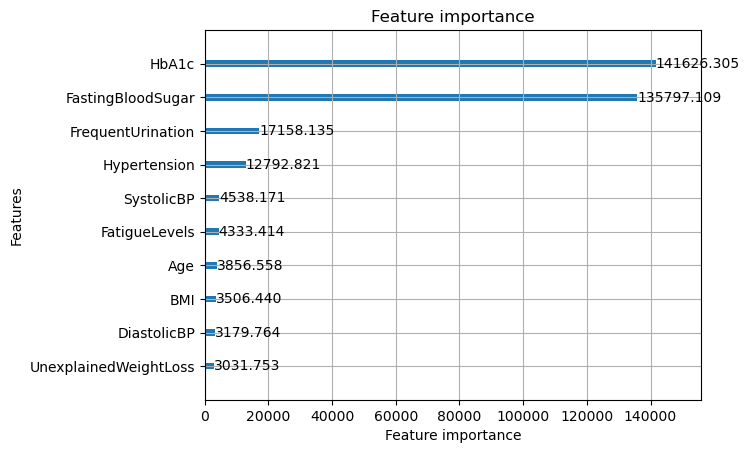

In [25]:
# Preprocessing
# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking', 'AlcoholConsumption', 
                    'PhysicalActivity', 'DietQuality', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 
                    'WaterQuality', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']
numerical_cols = [col for col in diabetes_data.columns if col not in categorical_cols + ['Diagnosis']]

# Encode categorical features using Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    diabetes_data[col] = le.fit_transform(diabetes_data[col].astype(str))

# Split the data into features and target
X = diabetes_data.drop('Diagnosis', axis=1)
y = diabetes_data['Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create LightGBM datasets
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_cols)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'auc',  # Use AUC for binary classification
    'num_leaves': 64,  # Adjust num_leaves
    'learning_rate': 0.001,  # Lower learning rate for better convergence
    'feature_fraction': 0.8,  # Fraction of features to be used
    'bagging_fraction': 0.7,  # Fraction of data to be used for each iteration
    'bagging_freq': 5,
    'lambda_l1': 0.1,  # L1 regularization
    'lambda_l2': 0.1,  # L2 regularization
    'boosting_type': 'gbdt',
    'max_depth': 15,  # Maximum depth of a tree
    'verbose': -1,
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'verbose': 0,
    'num_threads': 4,
    'seed': 42,
    'early_stopping_round': 100,
    'num_iterations': 1000,
    'max_depth': -1,
}

# Train model with early stopping using callbacks
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=[lgb_train, lgb_eval],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),  # Correct callback for early stopping
        lgb.log_evaluation(period=10)  # Optional: log evaluation every 10 rounds
    ]
)

# Predict on test set
y_pred_proba = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred_proba]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Feature importance
lgb.plot_importance(gbm, max_num_features=10, importance_type='gain')

In [15]:
# Classification report
print(classification_report(y_test, y_pred))
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


              precision    recall  f1-score   support

           0       0.93      0.96      0.95       226
           1       0.94      0.89      0.92       150

    accuracy                           0.94       376
   macro avg       0.94      0.93      0.93       376
weighted avg       0.94      0.94      0.94       376

[[218   8]
 [ 16 134]]


[I 2024-09-05 20:26:07,016] A new study created in memory with name: no-name-3cfee5ee-0d9f-43e6-8295-7970517695c5
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be remov

Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.965164	valid's auc: 0.942876
[20]	train's auc: 0.969082	valid's auc: 0.949322
[30]	train's auc: 0.969029	valid's auc: 0.949381
[40]	train's auc: 0.971796	valid's auc: 0.951416
[50]	train's auc: 0.974041	valid's auc: 0.953451
[60]	train's auc: 0.976088	valid's auc: 0.953953
[70]	train's auc: 0.977465	valid's auc: 0.953687
[80]	train's auc: 0.979814	valid's auc: 0.955398
[90]	train's auc: 0.981659	valid's auc: 0.957581
[100]	train's auc: 0.982906	valid's auc: 0.957906
[110]	train's auc: 0.984025	valid's auc: 0.95882
[120]	train's auc: 0.9854	valid's auc: 0.96056
[130]	train's auc: 0.987218	valid's auc: 0.959646
[140]	train's auc: 0.988627	valid's auc: 0.959971
[150]	train's auc: 0.990275	valid's auc: 0.960118
[160]	train's auc: 0.991783	valid's auc: 0.960118
[170]	train's auc: 0.993029	valid's auc: 0.959941
[180]	train's auc: 0.994261	valid's auc: 0.960413
[190]	train's auc: 0.995404	valid's auc: 0.960855
[2

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.988643	valid's auc: 0.959263
[20]	train's auc: 0.989563	valid's auc: 0.958422
[30]	train's auc: 0.990723	valid's auc: 0.956608
[40]	train's auc: 0.990688	valid's auc: 0.956431
[50]	train's auc: 0.990428	valid's auc: 0.956313
[60]	train's auc: 0.99075	valid's auc: 0.957493
Early stopping, best iteration is:
[11]	train's auc: 0.989331	valid's auc: 0.959366
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.963509	valid's auc: 0.947625
[20]	train's auc: 0.961604	valid's auc: 0.939012
[30]	train's auc: 0.957301	valid's auc: 0.93326
[40]	train's auc: 0.962163	valid's auc: 0.935383
[50]	train's auc: 0.962047	valid's auc: 0.934528
[60]	train's auc: 0.962759	valid's auc: 0.935944
Early stopping, best iteration is:
[13]	train's auc: 0.964384	valid's auc: 0.949572
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.974057	valid's auc: 0.954336
[20]	train's a

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

[160]	train's auc: 0.99939	valid's auc: 0.959145
[170]	train's auc: 0.999648	valid's auc: 0.959027
[180]	train's auc: 0.999801	valid's auc: 0.959381
[190]	train's auc: 0.999893	valid's auc: 0.959086
Early stopping, best iteration is:
[149]	train's auc: 0.998971	valid's auc: 0.960885
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.967089	valid's auc: 0.939558
[20]	train's auc: 0.984276	valid's auc: 0.958968
[30]	train's auc: 0.986895	valid's auc: 0.957817
[40]	train's auc: 0.990804	valid's auc: 0.958496
[50]	train's auc: 0.993343	valid's auc: 0.959823
[60]	train's auc: 0.995695	valid's auc: 0.960472
[70]	train's auc: 0.997789	valid's auc: 0.960885
[80]	train's auc: 0.99911	valid's auc: 0.958496
[90]	train's auc: 0.999605	valid's auc: 0.958142
[100]	train's auc: 0.999854	valid's auc: 0.959617
[110]	train's auc: 0.999969	valid's auc: 0.961032
Early stopping, best iteration is:
[67]	train's auc: 0.997312	valid's auc: 0.962448
Training until validation score

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

[150]	train's auc: 0.970653	valid's auc: 0.954749
[160]	train's auc: 0.970944	valid's auc: 0.954631
[170]	train's auc: 0.971208	valid's auc: 0.95528
[180]	train's auc: 0.971311	valid's auc: 0.955192
[190]	train's auc: 0.971324	valid's auc: 0.955074
[200]	train's auc: 0.971844	valid's auc: 0.955546
[210]	train's auc: 0.972124	valid's auc: 0.955782
[220]	train's auc: 0.972393	valid's auc: 0.955811
[230]	train's auc: 0.972908	valid's auc: 0.956195
[240]	train's auc: 0.973376	valid's auc: 0.956224
[250]	train's auc: 0.973769	valid's auc: 0.9559
[260]	train's auc: 0.973717	valid's auc: 0.955929
[270]	train's auc: 0.97401	valid's auc: 0.956077
Early stopping, best iteration is:
[228]	train's auc: 0.972847	valid's auc: 0.956431
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.958665	valid's auc: 0.933422
[20]	train's auc: 0.979582	valid's auc: 0.953923
[30]	train's auc: 0.982238	valid's auc: 0.953569
[40]	train's auc: 0.98542	valid's auc: 0.955015
[50]	train's 

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.946606	valid's auc: 0.931032
[20]	train's auc: 0.971689	valid's auc: 0.952537
[30]	train's auc: 0.974712	valid's auc: 0.952773
[40]	train's auc: 0.977102	valid's auc: 0.954779
[50]	train's auc: 0.978149	valid's auc: 0.956224
[60]	train's auc: 0.979565	valid's auc: 0.957257
[70]	train's auc: 0.980695	valid's auc: 0.957021
[80]	train's auc: 0.981888	valid's auc: 0.958171
[90]	train's auc: 0.982869	valid's auc: 0.958702
[100]	train's auc: 0.984003	valid's auc: 0.959351
[110]	train's auc: 0.985116	valid's auc: 0.959941
[120]	train's auc: 0.986313	valid's auc: 0.958997
[130]	train's auc: 0.987406	valid's auc: 0.959794
[140]	train's auc: 0.988254	valid's auc: 0.959381
[150]	train's auc: 0.989711	valid's auc: 0.959381
[160]	train's auc: 0.990631	valid's auc: 0.959233
Early stopping, best iteration is:
[111]	train's auc: 0.98524	valid's auc: 0.960236
Training until validation scores don't improve for 50 rounds
[10

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.96199	valid's auc: 0.940295
[20]	train's auc: 0.972966	valid's auc: 0.95292
[30]	train's auc: 0.974364	valid's auc: 0.953894
[40]	train's auc: 0.97573	valid's auc: 0.95292
[50]	train's auc: 0.975002	valid's auc: 0.955133
[60]	train's auc: 0.976501	valid's auc: 0.95472
[70]	train's auc: 0.977157	valid's auc: 0.953717
Early stopping, best iteration is:
[23]	train's auc: 0.975009	valid's auc: 0.955634
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.942589	valid's auc: 0.928835
[20]	train's auc: 0.959908	valid's auc: 0.948835
[30]	train's auc: 0.967708	valid's auc: 0.953805
[40]	train's auc: 0.967404	valid's auc: 0.952537
[50]	train's auc: 0.968332	valid's auc: 0.953392
[60]	train's auc: 0.967657	valid's auc: 0.953422
[70]	train's auc: 0.966418	valid's auc: 0.952832
[80]	train's auc: 0.966339	valid's auc: 0.952301
Early stopping, best iteration is:
[32]	train's auc: 0.967885	va

[I 2024-09-05 20:26:08,340] Trial 16 finished with value: 0.9592625368731562 and parameters: {'num_leaves': 119, 'learning_rate': 0.035964988181660384, 'feature_fraction': 0.7536668372333142, 'bagging_fraction': 0.9354700526556511, 'bagging_freq': 3, 'min_child_samples': 60, 'lambda_l1': 0.00016258970480067655, 'lambda_l2': 0.030626821182561454, 'max_depth': 14}. Best is trial 0 with value: 0.9625958702064897.
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.95729	valid's auc: 0.946563
[20]	train's auc: 0.967424	valid's auc: 0.950988
[30]	train's auc: 0.964291	valid's auc: 0.944322
[40]	train's auc: 0.967386	valid's auc: 0.945251
[50]	train's auc: 0.965011	valid's auc: 0.94413
[60]	train's auc: 0.967165	valid's auc: 0.944985
Early stopping, best iteration is:
[19]	train's auc: 0.966717	valid's auc: 0.951932
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.967533	valid's auc: 0.929587
[20]	train's auc: 0.983966	valid's auc: 0.955811
[30]	train's auc: 0.985347	valid's auc: 0.957463
[40]	train's auc: 0.987495	valid's auc: 0.957286
[50]	train's auc: 0.98865	valid's auc: 0.960413
[60]	train's auc: 0.988579	valid's auc: 0.959263
[70]	train's auc: 0.988745	valid's auc: 0.959528
[80]	train's auc: 0.989425	valid's auc: 0.957906
[90]	train's auc: 0.990557	valid's auc: 0.959499
[100]	train's auc: 0.99069	valid's auc: 0.961062
[110]	train's

[I 2024-09-05 20:26:08,615] Trial 19 finished with value: 0.9589675516224189 and parameters: {'num_leaves': 72, 'learning_rate': 0.0961797270034785, 'feature_fraction': 0.9972029915422448, 'bagging_fraction': 0.9478480199577674, 'bagging_freq': 9, 'min_child_samples': 46, 'lambda_l1': 4.21933097815905e-05, 'lambda_l2': 1.940928720880538e-05, 'max_depth': 18}. Best is trial 0 with value: 0.9625958702064897.
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.976095	valid's auc: 0.951976
[20]	train's auc: 0.982448	valid's auc: 0.956357
[30]	train's auc: 0.988247	valid's auc: 0.957021
[40]	train's auc: 0.994735	valid's auc: 0.958466
[50]	train's auc: 0.997806	valid's auc: 0.957257
[60]	train's auc: 0.998896	valid's auc: 0.957493
[70]	train's auc: 0.999666	valid's auc: 0.958171
[80]	train's auc: 0.99986	valid's auc: 0.957404
Early stopping, best iteration is:
[39]	train's auc: 0.99417	valid's auc: 0.958968
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.954965	valid's auc: 0.93233
[20]	train's auc: 0.972611	valid's auc: 0.953776
[30]	train's auc: 0.974366	valid's auc: 0.952773
[40]	train's auc: 0.978746	valid's auc: 0.955369
[50]	train's auc: 0.979725	valid's auc: 0.958466
[60]	train's auc: 0.981219	valid's auc: 0.956962
[70]	train's auc: 0.982751	valid's auc: 0.95708
[80]	train's auc: 0.984244	valid's auc: 0.958201
[90]	train's a

[I 2024-09-05 20:26:08,914] Trial 21 finished with value: 0.9631858407079645 and parameters: {'num_leaves': 39, 'learning_rate': 0.016238598205958864, 'feature_fraction': 0.5521662292748979, 'bagging_fraction': 0.7616228809772407, 'bagging_freq': 5, 'min_child_samples': 25, 'lambda_l1': 0.046106275784370515, 'lambda_l2': 1.3002409606083801e-07, 'max_depth': 22}. Best is trial 21 with value: 0.9631858407079645.


Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.966978	valid's auc: 0.927345
[20]	train's auc: 0.983595	valid's auc: 0.953599
[30]	train's auc: 0.98528	valid's auc: 0.954602
[40]	train's auc: 0.986978	valid's auc: 0.954395
[50]	train's auc: 0.987896	valid's auc: 0.957198
[60]	train's auc: 0.988403	valid's auc: 0.958968
[70]	train's auc: 0.988846	valid's auc: 0.958732
[80]	train's auc: 0.989554	valid's auc: 0.958319
[90]	train's auc: 0.990669	valid's auc: 0.959322
[100]	train's auc: 0.990649	valid's auc: 0.960531
[110]	train's auc: 0.991436	valid's auc: 0.961445
[120]	train's auc: 0.992126	valid's auc: 0.960944
[130]	train's auc: 0.992719	valid's auc: 0.961091
[140]	train's auc: 0.993308	valid's auc: 0.96174
[150]	train's auc: 0.994034	valid's auc: 0.961917
[160]	train's auc: 0.994574	valid's auc: 0.96177
[170]	train's auc: 0.995107	valid's auc: 0.962124
[180]	train's auc: 0.995592	valid's auc: 0.962743
[190]	train's auc: 0.995911	valid's auc: 0.962448
[

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

[20]	train's auc: 0.985561	valid's auc: 0.948673
[30]	train's auc: 0.987539	valid's auc: 0.953776
[40]	train's auc: 0.989117	valid's auc: 0.955516
[50]	train's auc: 0.990262	valid's auc: 0.957935
[60]	train's auc: 0.990419	valid's auc: 0.95764
[70]	train's auc: 0.990452	valid's auc: 0.957817
[80]	train's auc: 0.991134	valid's auc: 0.958378
[90]	train's auc: 0.991774	valid's auc: 0.957994
[100]	train's auc: 0.991615	valid's auc: 0.958437
[110]	train's auc: 0.991984	valid's auc: 0.959204
[120]	train's auc: 0.99236	valid's auc: 0.958732
[130]	train's auc: 0.992767	valid's auc: 0.958761
[140]	train's auc: 0.993035	valid's auc: 0.958142
[150]	train's auc: 0.993451	valid's auc: 0.95944
[160]	train's auc: 0.993993	valid's auc: 0.958997
[170]	train's auc: 0.994264	valid's auc: 0.959764
[180]	train's auc: 0.994528	valid's auc: 0.960206
[190]	train's auc: 0.99483	valid's auc: 0.960383
[200]	train's auc: 0.994993	valid's auc: 0.960147
[210]	train's auc: 0.995052	valid's auc: 0.960649
[220]	train'

[I 2024-09-05 20:26:09,203] Trial 22 finished with value: 0.9628023598820059 and parameters: {'num_leaves': 32, 'learning_rate': 0.007865514833700437, 'feature_fraction': 0.56393647607866, 'bagging_fraction': 0.657158176246883, 'bagging_freq': 5, 'min_child_samples': 10, 'lambda_l1': 0.09126056129169283, 'lambda_l2': 9.96766965373424e-07, 'max_depth': 22}. Best is trial 21 with value: 0.9631858407079645.
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

[340]	train's auc: 0.997548	valid's auc: 0.962507
Early stopping, best iteration is:
[298]	train's auc: 0.996881	valid's auc: 0.962802
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.971724	valid's auc: 0.937714
[20]	train's auc: 0.981965	valid's auc: 0.954366
[30]	train's auc: 0.983409	valid's auc: 0.95528
[40]	train's auc: 0.984556	valid's auc: 0.951593
[50]	train's auc: 0.986276	valid's auc: 0.954366
[60]	train's auc: 0.986444	valid's auc: 0.956991
[70]	train's auc: 0.986377	valid's auc: 0.957581
[80]	train's auc: 0.986661	valid's auc: 0.958702
[90]	train's auc: 0.986855	valid's auc: 0.957375
[100]	train's auc: 0.986892	valid's auc: 0.957345
[110]	train's auc: 0.987404	valid's auc: 0.957552
[120]	train's auc: 0.987771	valid's auc: 0.956903
Early stopping, best iteration is:
[74]	train's auc: 0.986403	valid's auc: 0.959086
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.965468	valid's auc: 0.947316
[20]	train's auc: 0.

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

[40]	train's auc: 0.974528	valid's auc: 0.952566
[50]	train's auc: 0.976678	valid's auc: 0.956814
[60]	train's auc: 0.976333	valid's auc: 0.956047
[70]	train's auc: 0.976971	valid's auc: 0.955811
[80]	train's auc: 0.977699	valid's auc: 0.955516
[90]	train's auc: 0.977742	valid's auc: 0.956047
[100]	train's auc: 0.978413	valid's auc: 0.959027
[110]	train's auc: 0.979604	valid's auc: 0.960295
[120]	train's auc: 0.980142	valid's auc: 0.960059
[130]	train's auc: 0.980557	valid's auc: 0.959145
[140]	train's auc: 0.980745	valid's auc: 0.959853
[150]	train's auc: 0.981364	valid's auc: 0.960118
[160]	train's auc: 0.982006	valid's auc: 0.960088
[170]	train's auc: 0.982502	valid's auc: 0.961032
[180]	train's auc: 0.982909	valid's auc: 0.961239
[190]	train's auc: 0.983016	valid's auc: 0.960295
[200]	train's auc: 0.983306	valid's auc: 0.959853
[210]	train's auc: 0.983687	valid's auc: 0.960649
[220]	train's auc: 0.984213	valid's auc: 0.960088
[230]	train's auc: 0.984687	valid's auc: 0.960147
Early 

[I 2024-09-05 20:26:09,613] Trial 25 finished with value: 0.9592035398230088 and parameters: {'num_leaves': 34, 'learning_rate': 0.0027970974635897644, 'feature_fraction': 0.6438003106050018, 'bagging_fraction': 0.6219440772734213, 'bagging_freq': 7, 'min_child_samples': 22, 'lambda_l1': 0.02276426388052313, 'lambda_l2': 0.00019376916160710798, 'max_depth': 24}. Best is trial 21 with value: 0.9631858407079645.
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

[110]	train's auc: 0.983438	valid's auc: 0.95885
[120]	train's auc: 0.984294	valid's auc: 0.958407
[130]	train's auc: 0.984869	valid's auc: 0.95826
[140]	train's auc: 0.984808	valid's auc: 0.958024
[150]	train's auc: 0.984945	valid's auc: 0.958289
[160]	train's auc: 0.984969	valid's auc: 0.958289
Early stopping, best iteration is:
[113]	train's auc: 0.983912	valid's auc: 0.959204
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.964279	valid's auc: 0.9341
[20]	train's auc: 0.981871	valid's auc: 0.954366
[30]	train's auc: 0.983427	valid's auc: 0.95469
[40]	train's auc: 0.98512	valid's auc: 0.9559
[50]	train's auc: 0.985677	valid's auc: 0.956755
[60]	train's auc: 0.985985	valid's auc: 0.957935
[70]	train's auc: 0.98632	valid's auc: 0.957699
[80]	train's auc: 0.987603	valid's auc: 0.957699
[90]	train's auc: 0.988542	valid's auc: 0.957935
[100]	train's auc: 0.989521	valid's auc: 0.958319
[110]	train's auc: 0.99047	valid's auc: 0.957758
[120]	train's auc: 0.99

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.963337	valid's auc: 0.932625
[20]	train's auc: 0.980363	valid's auc: 0.957345
[30]	train's auc: 0.982624	valid's auc: 0.957994
[40]	train's auc: 0.984078	valid's auc: 0.95472
[50]	train's auc: 0.985011	valid's auc: 0.958673
[60]	train's auc: 0.984425	valid's auc: 0.960649
[70]	train's auc: 0.983745	valid's auc: 0.960944
[80]	train's auc: 0.984399	valid's auc: 0.958968
[90]	train's auc: 0.985269	valid's auc: 0.959322
[100]	train's auc: 0.985337	valid's auc: 0.958525
[110]	train's auc: 0.985472	valid's auc: 0.958496
Early stopping, best iteration is:
[68]	train's auc: 0.98392	valid's auc: 0.961504
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.946806	valid's auc: 0.928363
[20]	train's auc: 0.959695	valid's auc: 0.940074
[30]	train's auc: 0.963808	valid's auc: 0.947994
[40]	train's auc: 0.96716	valid's auc: 0.950501
[50]	train's auc: 0.968985	valid's auc: 0.952419
[60]	train'

[I 2024-09-05 20:26:09,988] Trial 28 finished with value: 0.96023598820059 and parameters: {'num_leaves': 62, 'learning_rate': 0.023590856454564508, 'feature_fraction': 0.7952548665842558, 'bagging_fraction': 0.6760397017200768, 'bagging_freq': 9, 'min_child_samples': 5, 'lambda_l1': 7.528814134913535, 'lambda_l2': 7.03253339960452e-08, 'max_depth': 27}. Best is trial 21 with value: 0.9631858407079645.
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.937263	valid's auc: 0.923127
[20]	train's auc: 0.936058	valid's auc: 0.923702
[30]	train's auc: 0.936756	valid's auc: 0.922198
[40]	train's auc: 0.941804	valid's auc: 0.927891
[50]	train's auc: 0.947185	valid's auc: 0.931313
[60]	train's auc: 0.948462	valid's auc: 0.931136
[70]	train's auc: 0.950175	valid's auc: 0.931519
[80]	train's auc: 0.950419	valid's auc: 0.931755
[90]	train's auc: 0.95196	valid's auc: 0.934056
[100]	train's auc: 0.953035	valid's auc: 0.934528
[110]	train's auc: 0.953647	valid's auc: 0.936327
[120]	train's auc: 0.95368	valid's auc: 0.936357
[130]	train's auc: 0.954605	valid's auc: 0.9391
[140]	train's auc: 0.955204	valid's auc: 0.938658
[150]	train's auc: 0.954903	valid's auc: 0.937714
[160]	train's auc: 0.955059	valid's auc: 0.939395
[170]	train's auc: 0.95463	valid's auc: 0.938451
[180]	train's auc: 0.954325	valid's auc: 0.938304
[190]	train's auc: 0.953942	valid's auc: 0.937832
[20

[I 2024-09-05 20:26:10,258] Trial 31 finished with value: 0.9648377581120944 and parameters: {'num_leaves': 38, 'learning_rate': 0.06581599894044624, 'feature_fraction': 0.5831515521211988, 'bagging_fraction': 0.9348053317002332, 'bagging_freq': 3, 'min_child_samples': 36, 'lambda_l1': 0.15812876378295648, 'lambda_l2': 5.23284566657173e-07, 'max_depth': 21}. Best is trial 31 with value: 0.9648377581120944.
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

[140]	train's auc: 0.999998	valid's auc: 0.963038
[150]	train's auc: 1	valid's auc: 0.963156
Early stopping, best iteration is:
[107]	train's auc: 0.999803	valid's auc: 0.964838
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.956529	valid's auc: 0.928879
[20]	train's auc: 0.977428	valid's auc: 0.955988
[30]	train's auc: 0.980004	valid's auc: 0.959115
[40]	train's auc: 0.981298	valid's auc: 0.956962
[50]	train's auc: 0.981337	valid's auc: 0.95823
[60]	train's auc: 0.981143	valid's auc: 0.959617
[70]	train's auc: 0.980983	valid's auc: 0.957817
[80]	train's auc: 0.981829	valid's auc: 0.958407
[90]	train's auc: 0.982954	valid's auc: 0.960265
[100]	train's auc: 0.983348	valid's auc: 0.960029
[110]	train's auc: 0.983676	valid's auc: 0.960118
[120]	train's auc: 0.984242	valid's auc: 0.960796
[130]	train's auc: 0.984425	valid's auc: 0.959676
[140]	train's auc: 0.984582	valid's auc: 0.959381
[150]	train's auc: 0.985144	valid's auc: 0.960088
[160]	train's auc: 0.

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

[50]	train's auc: 0.993514	valid's auc: 0.958555
[60]	train's auc: 0.995157	valid's auc: 0.958673
[70]	train's auc: 0.997048	valid's auc: 0.958201
[80]	train's auc: 0.998162	valid's auc: 0.958378
[90]	train's auc: 0.998743	valid's auc: 0.959971
[100]	train's auc: 0.9992	valid's auc: 0.960678
[110]	train's auc: 0.999486	valid's auc: 0.960708
[120]	train's auc: 0.999677	valid's auc: 0.959941
[130]	train's auc: 0.999829	valid's auc: 0.960236
[140]	train's auc: 0.999937	valid's auc: 0.961416
[150]	train's auc: 0.999972	valid's auc: 0.961917
[160]	train's auc: 0.999993	valid's auc: 0.962743
[170]	train's auc: 0.999998	valid's auc: 0.962743
[180]	train's auc: 0.999998	valid's auc: 0.961947
[190]	train's auc: 0.999998	valid's auc: 0.961209
[200]	train's auc: 1	valid's auc: 0.962419
[210]	train's auc: 1	valid's auc: 0.961947
Early stopping, best iteration is:
[165]	train's auc: 0.999996	valid's auc: 0.963127
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.97723

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),  # Fraction of data to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

[100]	train's auc: 0.999375	valid's auc: 0.962891
[110]	train's auc: 0.999613	valid's auc: 0.961917
[120]	train's auc: 0.999829	valid's auc: 0.961858
Early stopping, best iteration is:
[73]	train's auc: 0.997695	valid's auc: 0.963658
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.972568	valid's auc: 0.940767
[20]	train's auc: 0.98552	valid's auc: 0.956401
[30]	train's auc: 0.987924	valid's auc: 0.956608
[40]	train's auc: 0.990964	valid's auc: 0.956283
[50]	train's auc: 0.992806	valid's auc: 0.957817
[60]	train's auc: 0.994408	valid's auc: 0.957935
[70]	train's auc: 0.995973	valid's auc: 0.957552
[80]	train's auc: 0.99734	valid's auc: 0.959528
[90]	train's auc: 0.998088	valid's auc: 0.961239
[100]	train's auc: 0.998665	valid's auc: 0.962655
[110]	train's auc: 0.999121	valid's auc: 0.962537
[120]	train's auc: 0.999478	valid's auc: 0.962035
[130]	train's auc: 0.999696	valid's auc: 0.96118
[140]	train's auc: 0.999858	valid's auc: 0.962507
[150]	train's auc

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

[20]	train's auc: 0.972349	valid's auc: 0.958171
[30]	train's auc: 0.974041	valid's auc: 0.957965
[40]	train's auc: 0.977179	valid's auc: 0.957463
[50]	train's auc: 0.981381	valid's auc: 0.961475
[60]	train's auc: 0.982747	valid's auc: 0.963451
[70]	train's auc: 0.984644	valid's auc: 0.962714
[80]	train's auc: 0.985773	valid's auc: 0.963717
[90]	train's auc: 0.987056	valid's auc: 0.962625
[100]	train's auc: 0.988241	valid's auc: 0.961829
[110]	train's auc: 0.990301	valid's auc: 0.961416
[120]	train's auc: 0.991783	valid's auc: 0.960236
Early stopping, best iteration is:
[75]	train's auc: 0.985363	valid's auc: 0.96413
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.947884	valid's auc: 0.932876
[20]	train's auc: 0.966353	valid's auc: 0.954572
[30]	train's auc: 0.967004	valid's auc: 0.954366
[40]	train's auc: 0.970815	valid's auc: 0.955605
[50]	train's auc: 0.973894	valid's auc: 0.958938
[60]	train's auc: 0.976313	valid's auc: 0.959617
[70]	train's auc: 0.

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

[10]	train's auc: 0.949748	valid's auc: 0.933304
[20]	train's auc: 0.968363	valid's auc: 0.95292
[30]	train's auc: 0.969373	valid's auc: 0.954897
[40]	train's auc: 0.972863	valid's auc: 0.957139
[50]	train's auc: 0.975655	valid's auc: 0.958702
[60]	train's auc: 0.978949	valid's auc: 0.959705
[70]	train's auc: 0.980227	valid's auc: 0.959558
[80]	train's auc: 0.982491	valid's auc: 0.958407
[90]	train's auc: 0.983663	valid's auc: 0.958702
[100]	train's auc: 0.985133	valid's auc: 0.958319
[110]	train's auc: 0.9862	valid's auc: 0.957847
Early stopping, best iteration is:
[69]	train's auc: 0.980006	valid's auc: 0.960442
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.944303	valid's auc: 0.936873
[20]	train's auc: 0.966654	valid's auc: 0.956903
[30]	train's auc: 0.963758	valid's auc: 0.955664
[40]	train's auc: 0.964318	valid's auc: 0.956165
[50]	train's auc: 0.967898	valid's auc: 0.957788
[60]	train's auc: 0.968896	valid's auc: 0.958466
[70]	train's auc: 0.969

[I 2024-09-05 20:26:11,318] Trial 40 finished with value: 0.958849557522124 and parameters: {'num_leaves': 80, 'learning_rate': 0.0003772374266816928, 'feature_fraction': 0.6192360279374018, 'bagging_fraction': 0.5531494564842351, 'bagging_freq': 2, 'min_child_samples': 38, 'lambda_l1': 0.5054175410729919, 'lambda_l2': 0.007895490177909826, 'max_depth': 16}. Best is trial 31 with value: 0.9648377581120944.
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

[10]	train's auc: 0.941247	valid's auc: 0.924779
[20]	train's auc: 0.967563	valid's auc: 0.952035
[30]	train's auc: 0.970129	valid's auc: 0.953835
[40]	train's auc: 0.970975	valid's auc: 0.951298
[50]	train's auc: 0.969145	valid's auc: 0.955369
[60]	train's auc: 0.970019	valid's auc: 0.956844
[70]	train's auc: 0.970413	valid's auc: 0.955044
[80]	train's auc: 0.970913	valid's auc: 0.954366
[90]	train's auc: 0.971274	valid's auc: 0.957227
[100]	train's auc: 0.971381	valid's auc: 0.956903
[110]	train's auc: 0.971921	valid's auc: 0.958201
[120]	train's auc: 0.972493	valid's auc: 0.958348
[130]	train's auc: 0.973035	valid's auc: 0.958024
[140]	train's auc: 0.973234	valid's auc: 0.957788
[150]	train's auc: 0.973667	valid's auc: 0.958024
[160]	train's auc: 0.973523	valid's auc: 0.957404
Early stopping, best iteration is:
[115]	train's auc: 0.971853	valid's auc: 0.95885
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.973708	valid's auc: 0.931593
[20]	train's au

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.960175	valid's auc: 0.938289
[20]	train's auc: 0.97766	valid's auc: 0.955546
[30]	train's auc: 0.978855	valid's auc: 0.954484
[40]	train's auc: 0.980739	valid's auc: 0.953599
[50]	train's auc: 0.982106	valid's auc: 0.955369
[60]	train's auc: 0.983621	valid's auc: 0.956106
[70]	train's auc: 0.984762	valid's auc: 0.958378
[80]	train's auc: 0.986154	valid's auc: 0.959971
[90]	train's auc: 0.986803	valid's auc: 0.96056
[100]	train's auc: 0.987275	valid's auc: 0.960708
[110]	train's auc: 0.98852	valid's auc: 0.959912
[120]	train's auc: 0.989506	valid's auc: 0.960354
[130]	train's auc: 0.990466	valid's auc: 0.960796
[140]	train's auc: 0.990798	valid's auc: 0.961032
Early stopping, best iteration is:
[97]	train's auc: 0.987082	valid's auc: 0.961475
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.954095	valid's auc: 0.934336
[20]	train's auc: 0.976307	valid's auc: 0.959705
[30]	tra

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

[20]	train's auc: 0.959771	valid's auc: 0.947198
[30]	train's auc: 0.959869	valid's auc: 0.947581
[40]	train's auc: 0.962415	valid's auc: 0.949794
[50]	train's auc: 0.964001	valid's auc: 0.951593
[60]	train's auc: 0.966062	valid's auc: 0.951416
[70]	train's auc: 0.966836	valid's auc: 0.951888
[80]	train's auc: 0.969478	valid's auc: 0.954277
[90]	train's auc: 0.971044	valid's auc: 0.957375
[100]	train's auc: 0.972543	valid's auc: 0.957198
[110]	train's auc: 0.973405	valid's auc: 0.958319
[120]	train's auc: 0.974524	valid's auc: 0.958968
[130]	train's auc: 0.97479	valid's auc: 0.958319
[140]	train's auc: 0.974871	valid's auc: 0.958437
[150]	train's auc: 0.975455	valid's auc: 0.959292
[160]	train's auc: 0.976322	valid's auc: 0.959823
[170]	train's auc: 0.976646	valid's auc: 0.960177
[180]	train's auc: 0.977238	valid's auc: 0.959676
[190]	train's auc: 0.977517	valid's auc: 0.960118
[200]	train's auc: 0.977941	valid's auc: 0.960885
[210]	train's auc: 0.97826	valid's auc: 0.961504
[220]	trai

[I 2024-09-05 20:26:11,890] Trial 45 finished with value: 0.9629793510324484 and parameters: {'num_leaves': 30, 'learning_rate': 0.03786035446628745, 'feature_fraction': 0.6042866873163029, 'bagging_fraction': 0.5013317343552565, 'bagging_freq': 3, 'min_child_samples': 45, 'lambda_l1': 8.851316502083254, 'lambda_l2': 0.0006077674628955882, 'max_depth': 16}. Best is trial 31 with value: 0.9648377581120944.
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

[260]	train's auc: 0.971038	valid's auc: 0.962596
[270]	train's auc: 0.971069	valid's auc: 0.962478
Early stopping, best iteration is:
[228]	train's auc: 0.97047	valid's auc: 0.962979
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.950799	valid's auc: 0.939705
[20]	train's auc: 0.973837	valid's auc: 0.958997
[30]	train's auc: 0.976733	valid's auc: 0.960472
[40]	train's auc: 0.98014	valid's auc: 0.963687
[50]	train's auc: 0.981921	valid's auc: 0.966873
[60]	train's auc: 0.98351	valid's auc: 0.966962
[70]	train's auc: 0.985516	valid's auc: 0.965192
[80]	train's auc: 0.987738	valid's auc: 0.964277
[90]	train's auc: 0.989349	valid's auc: 0.964838
[100]	train's auc: 0.991396	valid's auc: 0.964012
Early stopping, best iteration is:
[58]	train's auc: 0.982913	valid's auc: 0.967935
Training until validation scores don't improve for 50 rounds
[10]	train's auc: 0.947205	valid's auc: 0.943274
[20]	train's auc: 0.966581	valid's auc: 0.953451
[30]	train's auc: 0.970

C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
C:\Users\Cajun\AppData\Local\Temp\ipykernel_12688\1017556028.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_frac

[40]	train's auc: 0.963142	valid's auc: 0.95115
[50]	train's auc: 0.963702	valid's auc: 0.95472
[60]	train's auc: 0.965881	valid's auc: 0.954307
[70]	train's auc: 0.96661	valid's auc: 0.953481
[80]	train's auc: 0.967249	valid's auc: 0.955015
[90]	train's auc: 0.968147	valid's auc: 0.954366
[100]	train's auc: 0.969226	valid's auc: 0.954012
[110]	train's auc: 0.970656	valid's auc: 0.95646
[120]	train's auc: 0.972183	valid's auc: 0.957994
[130]	train's auc: 0.972965	valid's auc: 0.958024
[140]	train's auc: 0.973706	valid's auc: 0.957758
[150]	train's auc: 0.974547	valid's auc: 0.958614
[160]	train's auc: 0.975068	valid's auc: 0.958407
[170]	train's auc: 0.975839	valid's auc: 0.959558
[180]	train's auc: 0.976477	valid's auc: 0.959853
[190]	train's auc: 0.976742	valid's auc: 0.959322
[200]	train's auc: 0.977826	valid's auc: 0.959823
[210]	train's auc: 0.978295	valid's auc: 0.959617
[220]	train's auc: 0.978863	valid's auc: 0.959145
[230]	train's auc: 0.979257	valid's auc: 0.95944
[240]	train

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

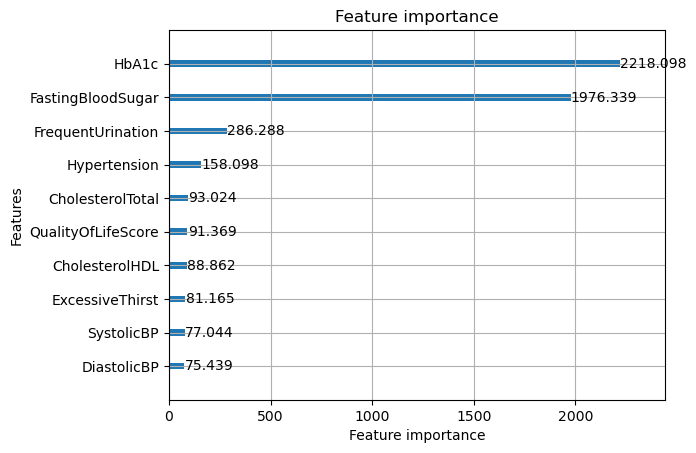

In [26]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'verbosity': -1,
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),  # Leaves range
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Learning rate range
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),  # Fraction of features to use
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),  # Fraction of data to use
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),  # Frequency of bagging
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),  # Min data in a child (leaf)
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),  # L1 regularization
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),  # L2 regularization
        'max_depth': trial.suggest_int('max_depth', 5, 30),  # Max depth of the tree
        'feature_pre_filter': False  # Set this to False when creating the dataset
    }

    # Create LightGBM datasets with feature_pre_filter set to False
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_cols, params={'feature_pre_filter': False})
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, params={'feature_pre_filter': False})

    # Train LightGBM model
    gbm = lgb.train(
        params,
        lgb_train,
        num_boost_round=1000,
        valid_sets=[lgb_train, lgb_eval],
        valid_names=['train', 'valid'],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),  # Early stopping to prevent overfitting
            lgb.log_evaluation(period=10)  # Optional: log evaluation every 10 rounds
        ]
    )

    # Predict on validation set
    y_pred_proba = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    auc = roc_auc_score(y_test, y_pred_proba)

    return auc  # Return AUC as the optimization metric

# Run Optuna optimization
study = optuna.create_study(direction='maximize')  # Maximize AUC
study.optimize(objective, n_trials=50)  # Run for 50 trials (you can increase this)

# Best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best AUC score:', study.best_value)

# Train final model with the best hyperparameters
best_params = study.best_params
best_params.update({'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'verbosity': -1, 'feature_pre_filter': False})

lgb_train_final = lgb.Dataset(X_train, y_train, categorical_feature=categorical_cols, params={'feature_pre_filter': False})
lgb_eval_final = lgb.Dataset(X_test, y_test, reference=lgb_train_final, params={'feature_pre_filter': False})

gbm_final = lgb.train(
    best_params,
    lgb_train_final,
    num_boost_round=1000,
    valid_sets=[lgb_train_final, lgb_eval_final],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=10)
    ]
)

# Predict on test set
y_pred_proba = gbm_final.predict(X_test, num_iteration=gbm_final.best_iteration)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred_proba]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Feature importance
lgb.plot_importance(gbm_final, max_num_features=10, importance_type='gain')

In [24]:
#Confusion matrix
confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))


[[220   6]
 [ 30 120]]
